In [ ]:
!pip install ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.9/214.9 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 92.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/deepnote-config/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: problems found:
        - require?  X jupyter-js-widgets/extension
Paths used for configuration of notebook: 
    	/deepnote-config/jupyter/nbconfig/notebook.json


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output
import ipywidgets as widgets
from ipywidgets import interactive
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('cab_rides.csv')
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [ ]:
df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [ ]:
df.shape

(693071, 10)

In [ ]:
df.cab_type.value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [ ]:
df.product_id.value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_luxsuv                             51235
lyft_premier                            51235
lyft                                    51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

Looking at the dataset, I see that the product_id col contains a mix of data with different pricing schemes, basically lyft, lyft_premier, lyft_luxsuv, etc.
So to check our basic concept, I'll extract only Lyft.

In [ ]:
extracted_df = df[df['product_id'] == 'lyft']
extracted_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
11,1.08,Lyft,1543432987778,Northeastern University,Back Bay,7.0,1.0,d859ec69-b3ff-4af8-9abd-441e31430c94,lyft,Lyft
21,0.72,Lyft,1545132905654,Haymarket Square,North Station,7.0,1.0,5ef44fdf-c5d3-4d07-967a-a8710e537e74,lyft,Lyft
33,3.24,Lyft,1543774987499,Northeastern University,North Station,11.0,1.0,174b960d-58f1-4dfd-8672-8b43f13726a7,lyft,Lyft
45,1.76,Lyft,1544963414097,South Station,North Station,9.0,1.0,104ced5c-1c1b-4021-94bb-b21af453399a,lyft,Lyft


In [ ]:
extracted_df.cab_type.value_counts()

Lyft    51235
Name: cab_type, dtype: int64

In [ ]:
extracted_df.name.value_counts()

Lyft    51235
Name: name, dtype: int64

I will drop the overlapping columns.

In [ ]:
col_to_drop = []
col_to_drop.append('cab_type')
col_to_drop.append('name')
col_to_drop.append('id')

In [ ]:
extracted_df.drop(col_to_drop, axis=1, inplace=True)
extracted_df.head()

,distance,time_stamp,destination,source,price,surge_multiplier,product_id
2,0.44,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft
11,1.08,1543432987778,Northeastern University,Back Bay,7.0,1.0,lyft
21,0.72,1545132905654,Haymarket Square,North Station,7.0,1.0,lyft
33,3.24,1543774987499,Northeastern University,North Station,11.0,1.0,lyft
45,1.76,1544963414097,South Station,North Station,9.0,1.0,lyft


Okay, so far we've removed duplicate or unnecessary cols.
And I'm going to additionally subtract the destination.
Here's why
- Pricing is determined by demand, and demand is formed near the place where the taxi is hailed (source).
- The distance between source and destination is already calculated and included in the col.

In [ ]:
extracted_df.drop('destination', axis=1, inplace=True)
extracted_df.head()

,distance,time_stamp,source,price,surge_multiplier,product_id
2,0.44,1543366822198,Haymarket Square,7.0,1.0,lyft
11,1.08,1543432987778,Back Bay,7.0,1.0,lyft
21,0.72,1545132905654,North Station,7.0,1.0,lyft
33,3.24,1543774987499,North Station,11.0,1.0,lyft
45,1.76,1544963414097,North Station,9.0,1.0,lyft


In [ ]:
extracted_df.source.value_counts()

Financial District         4373
Back Bay                   4276
Boston University          4270
South Station              4270
North End                  4270
Fenway                     4270
Haymarket Square           4269
Northeastern University    4269
Theatre District           4255
West End                   4248
Beacon Hill                4244
North Station              4221
Name: source, dtype: int64

Okay, so basically my idea is that the same place and similar time of day will have similar demand, so I'm going to extract a specific source and then sort by timestamp to create the data. I'll have about 4,000 pieces of data.

In [ ]:
FD_df = extracted_df[extracted_df['source'] == 'Financial District']
# sort it by time
FD_df.sort_values(by=['time_stamp'], inplace=True)
FD_df.head()

,distance,time_stamp,source,price,surge_multiplier,product_id
400862,4.52,1543203647695,Financial District,13.5,1.0,lyft
296172,0.52,1543207297193,Financial District,7.0,1.0,lyft
343097,4.55,1543207398281,Financial District,22.5,1.5,lyft
54503,4.39,1543209186837,Financial District,13.5,1.0,lyft
616866,3.42,1543209241978,Financial District,16.5,1.5,lyft


In [ ]:
# Set index with time_stamp
FD_df.set_index('time_stamp', inplace=True)
# drop product_id and source
FD_df.drop(['product_id', 'source'], axis=1, inplace=True)
FD_df.head()

,distance,price,surge_multiplier
time_stamp,,,
1543203647695,4.52,13.5,1.0
1543207297193,0.52,7.0,1.0
1543207398281,4.55,22.5,1.5
1543209186837,4.39,13.5,1.0
1543209241978,3.42,16.5,1.5


This is where we're going to apply the concept of dynamic pricing.
First, here's the basic formula for dynamic pricing (I found it through a literature search, and it's also in the preliminary research link below)

Price=Base Price×(1+η×Demand Factor)

https://yunchae-ds-playbook.oopy.io/50ee8b10-1b3a-4bb0-93c4-b0e5f73b530f

## Let's start Thompson Sampling

1. Base Price: To get the base price, I only averaged the surge_multiplier when it was 1, so I could get a rough idea of what it was.

In [ ]:
# Calculate the average price when surge_multiplier is 1 as Base Price
base_price = FD_df[FD_df['surge_multiplier'] == 1]['price'].mean()

Referring to the formula above, we know that we cannot predict the demand function exactly.
However, we want to determine a proxy for demand and proceed with Thomson sampling based on that.
The process of determining a demand proxy and building a regression model to represent the relationship between price and demand can go like this

2. Create a proxy for demand: as a proxy for demand, you can use surge_multiplier greater than 1. This is because it represents a situation where demand has increased and a surcharge has been applied to the price. In other words, a higher surge_multiplier value can be seen as indicating a higher demand state.
3. Build a regression model: Build a regression model to represent the relationship between surge_multiplier and price. This model is built using only data with surge_multiplier greater than 1. η is represented by the regression coefficient, which indicates the magnitude of the impact of price changes on demand.
3. Estimate the regression model: Estimate the regression model to find the value of η, which represents the elasticity of the impact of a change in price on demand.
4. Set a prior distribution for η: Set a prior distribution for η. You can initially set the prior distribution using a normal distribution, which will be updated with data.
5. Update the posterior distribution: As new data comes in, update the posterior distribution for Update the posterior distribution for η.

To build the regression model, we'll first filter out only the data with a surge_multiplier greater than 1, which we'll use for the regression analysis. This analysis will allow us to determine the posterior distribution of We can get an initial estimate of η. Now let's prepare our data and start the regression analysis.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter the dataframe to only include rows where surge_multiplier is greater than 1
high_demand_df = FD_df[FD_df['surge_multiplier'] > 1]

# Prepare the data for regression
X = high_demand_df[['surge_multiplier']]  # Predictor variable
y = high_demand_df['price']               # Response variable

# Since we're looking at a power-law relationship, we'll transform the predictor variable
# with a logarithm to linearize the relationship for the regression model
X_log = np.log(X)
y_log = np.log(y)

# Initialize and fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_log, y_log)

# The coefficient of the log-transformed predictor gives us the elasticity
eta_estimate = regression_model.coef_[0]

eta_estimate


0.6680427464185672

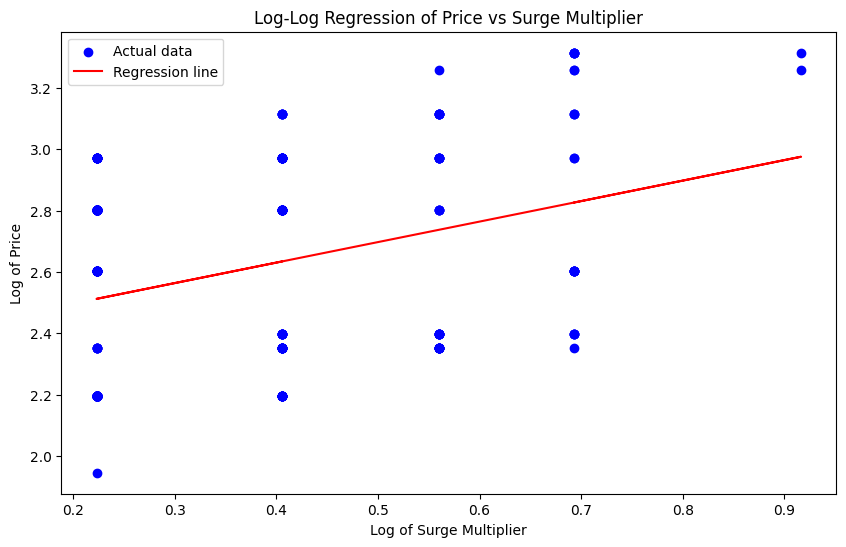

In [ ]:
import matplotlib.pyplot as plt

# Predict the log of price using the regression model
y_log_pred = regression_model.predict(X_log)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_log, y_log, color='blue', label='Actual data') # Actual data
plt.plot(X_log, y_log_pred, color='red', label='Regression line') # Regression line

# Labeling the plot
plt.title('Log-Log Regression of Price vs Surge Multiplier')
plt.xlabel('Log of Surge Multiplier')
plt.ylabel('Log of Price')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from ipywidgets import interact, IntSlider

class DynamicPricing:
    def __init__(self, initial_eta_mean, initial_eta_std, a):
        self.eta_mean = initial_eta_mean
        self.eta_std = initial_eta_std
        self.a = a
        self.price_points = []
        self.eta_points = []
        self.sampled_etas = []
        self.actual_prices = []
        self.revenue_history = []
        self.cumulative_revenue = 0  # Initialize cumulative revenue

    def update_posterior(self, price, actual_price, demand):
        # Ensure standard deviation is never zero
        if self.eta_std < 1e-6:
            self.eta_std = 1e-6

        # Calculate the sample eta based on actual price and demand
        eta_sample = -np.log(demand / self.a) / np.log(price)
        
        # Use a fixed value for likelihood_std
        likelihood_std = 0.1  # This can be adjusted as needed for the model

        # Bayesian update
        new_mean_numerator = self.eta_mean / self.eta_std**2 + eta_sample / likelihood_std**2
        new_mean_denominator = 1 / self.eta_std**2 + 1 / likelihood_std**2
        new_mean = new_mean_numerator / new_mean_denominator if new_mean_denominator != 0 else self.eta_mean
        
        new_std = (1 / self.eta_std**2 + 1 / likelihood_std**2)**(-0.5) if new_mean_denominator != 0 else self.eta_std

        # Logging detailed updates
        old_eta_mean, old_eta_std = self.eta_mean, self.eta_std
        self.eta_mean = new_mean
        self.eta_std = max(new_std, 1e-6)
        # print(f"Old eta_mean: {old_eta_mean:.6f}, New eta_mean: {self.eta_mean:.6f}, "
            #   f"Eta_sample: {eta_sample:.6f}, Price: {price}, Demand: {demand}, "
            #   f"Likelihood STD: {likelihood_std:.6f}")



    def thompson_sampling(self):
        sampled_eta = np.random.normal(self.eta_mean, self.eta_std)
        self.sampled_etas.append(sampled_eta)
        return sampled_eta

    def get_demand(self, price, eta):
        return self.a * price ** (-np.abs(eta))

    def calculate_rmse(self):
        estimated_prices = [self.get_price(d, e) for d, e in zip(self.actual_prices, self.sampled_etas)]
        return np.sqrt(mean_squared_error(self.actual_prices, estimated_prices))

    def get_price(self, demand, eta):
        price = (demand / self.a) ** (-1 / np.abs(eta))
        self.price_points.append(price)
        return price

    def calculate_revenue(self, price, demand):
        return price * demand

    def simulate_pricing_with_revenue_tracking(self, data):
        for index, row in data.iterrows():
            sampled_eta = self.thompson_sampling()
            demand = self.get_demand(row['price'], sampled_eta)
            estimated_price = self.get_price(demand, sampled_eta)
            revenue = self.calculate_revenue(row['price'], demand)  # Use actual price for revenue calculation
            self.cumulative_revenue += revenue
            self.revenue_history.append(self.cumulative_revenue)
            
            self.actual_prices.append(row['price'])
            self.eta_points.append(sampled_eta)
            
            # Update the posterior with the actual demand observed
            self.update_posterior(row['price'], estimated_price, demand)
            
            if index % 100 == 0 and index > 0:
                print(f'Index: {index}, RMSE: {self.calculate_rmse()}, Cumulative Revenue: {self.cumulative_revenue}, Eta: {self.eta_mean:.4f}')

    def plot_cumulative_revenue_over_time(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.revenue_history, label='Cumulative Revenue over time')
        plt.xlabel('Time')
        plt.ylabel('Cumulative Revenue')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def plot_demand_curve(dynamic_pricing, index):
        if index < 100 or index >= len(dynamic_pricing.sampled_etas):
            print("Index out of range for plotting.")
            return

        fig, ax = plt.subplots(figsize=(10, 6))
        
        # index까지의 가격 데이터 포인트 플로팅
        ax.scatter(dynamic_pricing.price_points[:index], [dynamic_pricing.get_demand(p, e) for p, e in zip(dynamic_pricing.price_points[:index], dynamic_pricing.sampled_etas[:index])], color='gray', s=10)
        
        # 수요 곡선 계산
        price_range = np.linspace(0.5 * min(dynamic_pricing.price_points), 1.5 * max(dynamic_pricing.price_points), 100)
        demand_curve = [dynamic_pricing.get_demand(p, dynamic_pricing.sampled_etas[index-1]) for p in price_range]

        ax.plot(price_range, demand_curve, label=f'η: {dynamic_pricing.sampled_etas[index-1]:.4f}')

        ax.set_xlabel('Price')
        ax.set_ylabel('Demand')
        ax.set_xlim([0, max(dynamic_pricing.price_points)])
        ax.set_ylim([0, max(demand_curve)])
        ax.legend()
        ax.grid(True)

        return fig


Now, let's run the dynamic pricing simulation step by step using the DynamicPricing class. To do so, we'll take the following steps

1. preset: set the necessary parameters, such as the value of a. Here, the A value approximates the peak of demand, so you can use, for example, the average number of ride requests over a period of time.
2. Update the posterior distribution: Collect new data to update the posterior distribution of η. Currently, we're using the initial estimate.
3. Run Thomson sampling: Sample the value of η from the posterior distribution.
4. Calculate demand: Use the sampled η to calculate the demand for a given price.
5. Update prices: Adjust prices based on market conditions.
6. Visualize simulation results: Periodically visualize the simulation results to evaluate the performance of the model.

So let's start by setting the a value based on our data.

As a side note, I changed the class we were working with a bit and put a minus sign in front of the eta in the class, so that it would count as a positive eta. 

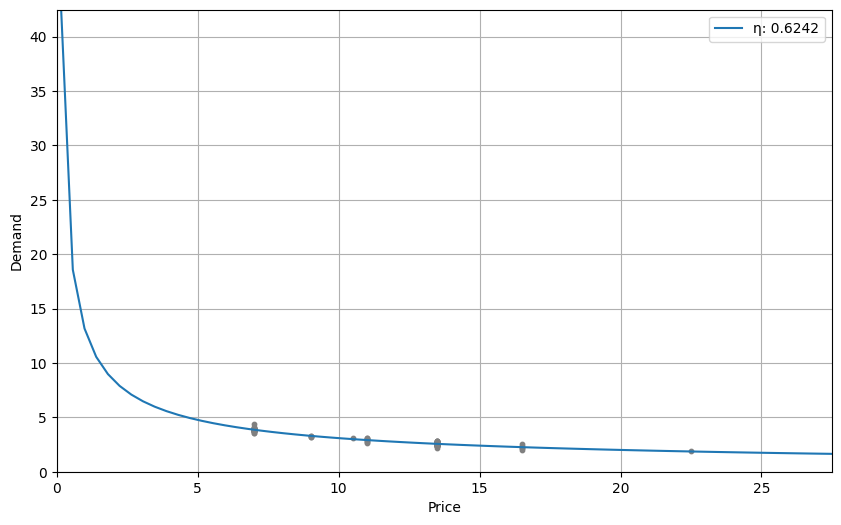

interactive(children=(IntSlider(value=100, description='index', max=2000, min=100, step=100), Output()), _dom_…

In [ ]:
# Instantiate the class with initial values
initial_eta_mean = 0.5  # Example mean value for eta
initial_eta_std = 0.1   # Example standard deviation for eta
# a_value = 10          # Example 'a' value for the demand function

# You can adjust the 'a' value to a specific ratio.
# a_value = 5
# a_value = 10
a_value = 13
# a_value = 15
# a_value = 20
# a_value = 25

# Initialize the class instance with the 'a' value.
dp = DynamicPricing(initial_eta_mean, initial_eta_std, a_value)

# Test the simulation with a subset of data
# Assume 'simulation_data' is a DataFrame with the relevant data
dp.simulate_pricing_with_revenue_tracking(FD_df[:2000])

### 
def interactive_chart(simulation):
    def show_chart(index):
        simulation.plot_demand_curve(index)
    
    interact(show_chart, index=IntSlider(min=100, max=len(simulation.actual_prices), step=100, value=100))

# Execute the interactive chart
interactive_chart(dp)


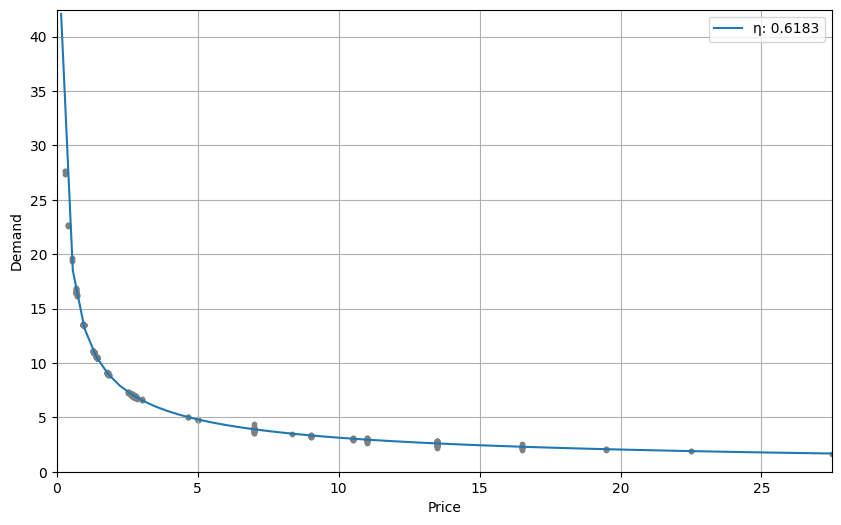

In [ ]:
# 시뮬레이션 실행 부분을 다시 실행하지 않고, plot_demand_curve 함수만 실행해보겠습니다.
# plot_demand_curve 함수는 위에서 이미 정의되었으므로, 클래스 인스턴스 dp가 여전히 유효하다고 가정하고
# 직접 인덱스를 지정하여 함수를 호출합니다.

# 임의의 인덱스 값 1000을 사용하겠습니다.
# 이번에는 plot_demand_curve 함수 내의 plt.show()를 호출하기 전에 plt 객체를 변수에 할당하여
# 여기에서 생성된 그래프를 직접 볼 수 있도록 하겠습니다.

import matplotlib.pyplot as plt

# 인덱스 1000에 대한 수요 곡선 시각화
dp.plot_demand_curve(1000)  # 이전 실행에서 이 함수가 이미 정의되어 있어야 합니다.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=31c7db23-e6da-4465-a558-ea9a7638bbc9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>